In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings 
warnings.filterwarnings('ignore')

In [21]:
os.chdir('C:/Users/sid/Downloads/data/Polynomial_Regression/')

In [22]:
data = pd.read_csv('Position_Salaries.csv')

In [23]:
x = data.iloc[: , 1:2].values
y = data.iloc[:, 2].values

In [24]:
x = x.reshape(-1, 1)
y = y.reshape(-1, 1)

In [39]:
# scaling because of the svr 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(x)
y = sc_y.fit_transform(y)

In [32]:
from sklearn.svm import SVR
regressor = SVR(kernel='rbf')
regressor.fit(x, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
b = np.array([[6.5]])

In [42]:
#we get scaled prediction if we do not inverse the scale 
y_pred = sc_y.inverse_transform(regressor.predict(sc_x.transform(b)))

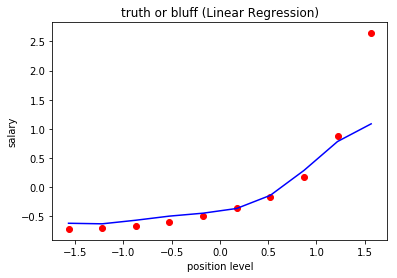

In [36]:
plt.scatter(x, y ,color='red')
plt.plot(x, regressor.predict(x), color='blue')
plt.title("truth or bluff (Linear Regression)")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()

In [37]:
y

array([[-0.72004253],
       [-0.70243757],
       [-0.66722767],
       [-0.59680786],
       [-0.49117815],
       [-0.35033854],
       [-0.17428902],
       [ 0.17781001],
       [ 0.88200808],
       [ 2.64250325]])

In [38]:
y_pred

array([-0.6197853 , -0.62924694, -0.56788994, -0.49732233, -0.44690338,
       -0.36617206, -0.14115569,  0.28557658,  0.78226531,  1.08559794])

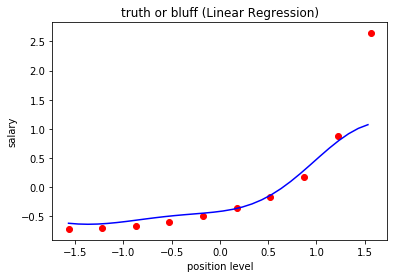

In [43]:
x_grid = np.arange(min(x), max(x), 0.1)
x_grid = x_grid.reshape(len(x_grid), 1)
plt.scatter(x, y ,color='red')
plt.plot(x_grid, regressor.predict(x_grid), color='blue')
plt.title("truth or bluff (Linear Regression)")
plt.xlabel("position level")
plt.ylabel("salary")
plt.show()